In [1]:
import math
import pandas as pd
import numpy as np
import csv
import math
from platform import python_version

In [2]:
columns = ['label']
for i in range(9):
    name = 'mean'+str(i+1)
    columns += [name]
for i in range(9):
    name = 'var'+str(i+1)
    columns += [name]
for i in range(36):
    name = 'interVar'+str(i+1)
    columns += [name]

In [3]:
def mvfeaturegeneration(b):
    W=b
    g1=W[0:3,0:3]#groups
    g2=W[0:3,3]
    g3=W[0:3,4:7]
    g4=W[3,0:3]
    g5=W[3,3]
    g6=W[3,4:7]
    g7=W[4:7,0:3]
    g8=W[4:7,3]
    g9=W[4:7,4:7]
    groups = [g1,g2,g3,g4,g5,g6,g7,g8,g9]
    
    meanf = np.zeros(9)
    varf = np.zeros(9)
    for idx,grp in enumerate(groups):
        mean = np.mean(grp)
        var = np.sum((grp-mean)**2)
        meanf[idx] = mean
        varf[idx] = var
    
    intervarf = np.zeros(36)
    idx = 0
    for i in range(9):
        for j in range(i+1,9):
            g1 = groups[i]
            g2 = groups[j]
            W1=(g1.size)/((g1.size)+(g2.size))
            W2=(g2.size)/((g1.size)+(g2.size))
            mu=((meanf[i]-meanf[j])**2)
            ivar=W1*W2*mu
            intervarf[idx] = ivar
            idx += 1

    return (np.concatenate((meanf,varf,intervarf),axis=None).tolist())

In [4]:
print(python_version())

3.5.2


In [5]:
##### Model 1 to detect nodes#####

data1 = pd.read_csv("diagonalmvdat.csv",names = columns, dtype = np.float32)#Model 1 dataset
data1.head()

,label,mean1,mean2,mean3,mean4,mean5,mean6,mean7,mean8,mean9,...,interVar27,interVar28,interVar29,interVar30,interVar31,interVar32,interVar33,interVar34,interVar35,interVar36
0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,3.000000,0.000000,3.000000,1.111111,...,1.687500,0.00,1.687500,0.111111,1.687500,0.0,0.668981,1.687500,0.308642,0.668981
1,0.0,0.000000,1.000000,1.000000,1.000000,0.0,1.666667,1.000000,1.666667,1.111111,...,0.520833,0.09,0.520833,0.111111,0.083333,0.0,0.057870,0.083333,0.003086,0.057870
2,0.0,0.666667,1.333333,1.666667,1.333333,0.0,2.000000,1.666667,2.000000,0.666667,...,0.750000,0.25,0.750000,0.040000,0.020833,0.0,0.333333,0.020833,0.250000,0.333333
3,0.0,1.555556,2.333333,2.333333,2.333333,0.0,1.000000,2.333333,1.000000,0.666667,...,0.187500,0.49,0.187500,0.040000,0.333333,0.0,0.020833,0.333333,0.694444,0.020833
4,0.0,1.111111,1.666667,1.666667,1.666667,0.0,1.000000,1.666667,1.000000,0.666667,...,0.187500,0.25,0.187500,0.040000,0.083333,0.0,0.020833,0.083333,0.250000,0.020833


In [6]:
unique, counts = np.unique(data1.iloc[:,0], return_counts=True)#No.of zero labels and one labels
dict(zip(unique, counts))

{0.0: 887, 1.0: 886}

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
scaler1.fit(data1.iloc[:,1:])
data1.iloc[:,1:]=scaler1.transform(data1.iloc[:,1:])

In [8]:
### Train Model1###

X = data1.drop('label', axis=1)
y = data1['label']

### RF classifier
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
import time

X, X_test, y, y_test = train_test_split(X, y, 
                                        test_size = 0.2, 
                                        random_state = 42,shuffle=True)

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X,y)

tic = time.process_time()
rfc_predict = rfc.predict(X_test)
toc = time.process_time()
print(toc - tic)

#print("=== Confusion Matrix ===")
#print(confusion_matrix(y_test, rfc_predict))
#print('\n')
print("Accuracy:",metrics.accuracy_score(y_test, rfc_predict))



0.010556827999999907
Accuracy: 0.9971830985915493


In [9]:
any(y_test==1)

True

In [10]:
X_test.shape

(355, 54)

In [11]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X, y)
tic = time.process_time()
knn_pred = knn.predict(X_test)
toc = time.process_time()
print(toc - tic)

#Predict the response for test dataset
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, knn_pred))
print('\n')
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, knn_pred))

0.031231276999999835
=== Confusion Matrix ===
[[176   2]
 [  1 176]]


Accuracy: 0.9915492957746479


In [12]:
##Decision Tree Classifier
dtc = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtc = dtc.fit(X,y)

#Predict the response for test dataset
tic = time.process_time()
dtc_pred = dtc.predict(X_test)
toc = time.process_time()
print(toc - tic)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, dtc_pred))
print('\n')

print("Accuracy:",metrics.accuracy_score(y_test, dtc_pred))

0.0019890860000000288
=== Confusion Matrix ===
[[178   0]
 [  0 177]]


Accuracy: 1.0


In [13]:
### SVC Classifier ##

classifier_linear = SVC(kernel='linear',gamma='auto', random_state = 1)
classifier_rbf = SVC(kernel='rbf',gamma='auto', random_state = 1)

classifier_rbf.fit(X,y)
classifier_linear.fit(X,y)
tic = time.process_time()
Y_pred_rbf = classifier_rbf.predict(X_test)
Y_linear = classifier_linear.predict(X_test)
toc = time.process_time()
print(toc - tic)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, Y_pred_rbf))
print('\n')

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, Y_linear))
print('\n')

print("Accuracy_rbf:",metrics.accuracy_score(y_test, Y_pred_rbf))
print("Accuracy_linear:",metrics.accuracy_score(y_test, Y_linear))

0.014799900999999949
=== Confusion Matrix ===
[[176   2]
 [ 14 163]]


=== Confusion Matrix ===
[[178   0]
 [  8 169]]


Accuracy_rbf: 0.9549295774647887
Accuracy_linear: 0.9774647887323944


In [14]:
### test model1 on real image##


In [15]:
#def flat_list(l):
#    flat_list = []
#    for sublist in l:
#        for item in sublist:
#            flat_list.append(item)
#    return flat_list

A=np.loadtxt(open("m_d_banknote.csv", "rb"), delimiter=",")

R=A   #unnormalized
rows = A.shape[1]
cols = A.shape[0]
maxValue = np.amax(A)
minValue = np.amin(A)
fv=[]                 #model1 feature vector along diagonal
for x in range(cols):
    for y in range(rows):
        A[x,y]=math.ceil(((A[x,y]-minValue)/(maxValue-minValue))*255) # Normalization
    
    
B=np.pad(A, ((3,3),(3,3)), 'constant',constant_values=0) #Padding the normalized with 0's for model1
for j in range(3,len(A)+3):
    fv.append(mvfeaturegeneration(B[j-3:j+4,j-3:j+4]))

In [16]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from PIL import Image

xpred = scaler1.transform(fv) # feature vectors to predict

classifier = {'rfc':rfc}#, 'knn':knn, 'dtc':dtc, 'classifier_linear':classifier_linear}

for name,clf in classifier.items():
    x =  clf.predict(xpred)
    L=[]  ### diagonal points detected as 1 from model1
    for i in range(0,len(x)):
        if x[i]==1:
            L.append(i)
    L.append(A.shape[0])
    
    plt.figure()
    fig,ax = plt.subplots(1)
    
    #B = A.astype('float32')#*255.0/65536.0
    #B = B.astype('uint16')
    ax.imshow(R, cmap='gray')
    width,height = L[0],L[0]
    for z in range(0,len(L)-1):
        rect = patches.Rectangle((L[z],L[z]),-width,-height,linewidth=1,edgecolor='r',facecolor='none')
        #  plt.scatter([int(L[z])],[int(L[z])], color='red', s=1)
        width, height = L[z+1]-L[z],L[z+1]-L[z]
        ax.add_patch(rect)
    rect = patches.Rectangle((L[z],L[z]),width,height,linewidth=2,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    
    img = 'banknote_'+name+'.eps'
    plt.savefig(img)
    plt.show()
    
dfl = pd.DataFrame(L)
dfl.to_csv('model1_res.csv', index=False, header=False)

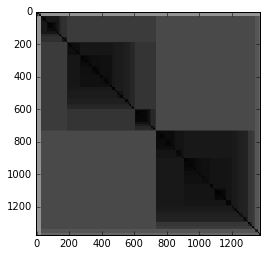

In [17]:
plt.imshow(R, cmap='gray')

In [18]:
#### Model 2 to detect Corners######

In [19]:
R.shape

(1372, 1372)

In [20]:
##### Training #####
columns = ['label']
for i in range(9):
    name = 'mean'+str(i+1)
    columns += [name]
for i in range(9):
    name = 'var'+str(i+1)
    columns += [name]
for i in range(36):
    name = 'interVar'+str(i+1)
    columns += [name]
data = pd.read_csv("MVdata.csv",names = columns, dtype = np.float32)
data.head()



,label,mean1,mean2,mean3,mean4,mean5,mean6,mean7,mean8,mean9,...,interVar27,interVar28,interVar29,interVar30,interVar31,interVar32,interVar33,interVar34,interVar35,interVar36
0,1.0,255.0,3.666667,3.000000,255.0,5.0,5.0,255.0,255.0,255.0,...,0.0,5625.000000,11718.7500,5625.000000,11718.7500,15625.00,11718.7500,0.00,0.0,0.0
1,1.0,255.0,2.000000,2.000000,255.0,3.0,3.0,255.0,89.0,89.0,...,0.0,5715.359863,1386.7500,665.640015,11907.0000,1849.00,1386.7500,5166.75,6889.0,0.0
2,1.0,89.0,11.333333,11.333333,89.0,16.0,16.0,255.0,255.0,255.0,...,0.0,5140.890137,10710.1875,5140.890137,10710.1875,14280.25,10710.1875,0.00,0.0,0.0
3,1.0,255.0,5.333333,4.000000,255.0,9.0,9.0,255.0,255.0,255.0,...,0.0,5446.439941,11346.7500,5446.439941,11346.7500,15129.00,11346.7500,0.00,0.0,0.0
4,1.0,255.0,1.000000,1.000000,255.0,1.0,1.0,255.0,255.0,255.0,...,0.0,5806.439941,12096.7500,5806.439941,12096.7500,16129.00,12096.7500,0.00,0.0,0.0


In [21]:
data.iloc[2089,:]

label           0.000000
mean1          81.000000
mean2          81.000000
mean3          81.000000
mean4          81.000000
mean5          81.000000
mean6          81.000000
mean7         104.000000
mean8         104.000000
mean9         104.000000
var1            0.000000
var2            0.000000
var3            0.000000
var4            0.000000
var5            0.000000
var6            0.000000
var7            0.000000
var8            0.000000
var9            0.000000
interVar1       0.000000
interVar2       0.000000
interVar3       0.000000
interVar4       0.000000
interVar5       0.000000
interVar6     132.250000
interVar7      99.187500
interVar8     132.250000
interVar9       0.000000
interVar10      0.000000
interVar11      0.000000
interVar12      0.000000
interVar13     99.187500
interVar14    132.250000
interVar15     99.187500
interVar16      0.000000
interVar17      0.000000
interVar18      0.000000
interVar19    132.250000
interVar20     99.187500
interVar21    132.250000


In [22]:
scaler = MinMaxScaler()
scaler.fit(data.iloc[:,1:])
data.iloc[:,1:]=scaler.transform(data.iloc[:,1:])

In [23]:
data.head()

,label,mean1,mean2,mean3,mean4,mean5,mean6,mean7,mean8,mean9,...,interVar27,interVar28,interVar29,interVar30,interVar31,interVar32,interVar33,interVar34,interVar35,interVar36
0,1.0,1.000000,0.014379,0.011765,1.000000,0.019608,0.019608,1.0,1.000000,1.000000,...,0.0,0.961169,0.961169,0.961169,0.961169,0.961169,0.961169,0.000000,0.000000,0.0
1,1.0,1.000000,0.007843,0.007843,1.000000,0.011765,0.011765,1.0,0.346457,0.346742,...,0.0,0.976609,0.113741,0.113741,0.976609,0.113741,0.113741,0.427119,0.426745,0.0
2,1.0,0.319672,0.044444,0.044444,0.319672,0.062745,0.062745,1.0,1.000000,1.000000,...,0.0,0.878447,0.878447,0.878447,0.878447,0.878447,0.878447,0.000000,0.000000,0.0
3,1.0,1.000000,0.020915,0.015686,1.000000,0.035294,0.035294,1.0,1.000000,1.000000,...,0.0,0.930657,0.930657,0.930657,0.930657,0.930657,0.930657,0.000000,0.000000,0.0
4,1.0,1.000000,0.003922,0.003922,1.000000,0.003922,0.003922,1.0,1.000000,1.000000,...,0.0,0.992172,0.992172,0.992172,0.992172,0.992172,0.992172,0.000000,0.000000,0.0


In [24]:
#np.where(np.isnan(data)==1)

In [25]:
unique, counts = np.unique(data.iloc[:,0], return_counts=True)
dict(zip(unique, counts))

{0.0: 1090, 1.0: 1455}

In [26]:
X = data.drop('label', axis=1)
y = data['label']
X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,shuffle=True)

rfc2 = RandomForestClassifier(n_estimators=100)
rfc2.fit(X,y)

tic = time.process_time()
rfc_predict = rfc2.predict(X_test)
toc = time.process_time()
print(toc - tic)

#print("=== Confusion Matrix ===")
#print(confusion_matrix(y_test, rfc_predict))
#print('\n')
print("Accuracy:",metrics.accuracy_score(y_test, rfc_predict))

0.012203546000000287
Accuracy: 0.9980353634577603


In [27]:
#any(X.isnull()==1)

In [28]:
#from sklearn.svm import SVC
#from sklearn.metrics import confusion_matrix
#from sklearn import metrics
#classifier_linear = SVC(kernel='linear',gamma='auto', random_state = 1)
#classifier_rbf = SVC(kernel='rbf',gamma='auto', random_state = 1)
#X = data.drop('label', axis=1)
#y = data['label']
#X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,shuffle=True)

#classifier_rbf.fit(X,y)
#classifier_linear.fit(X,y)
#tic = time.process_time()
#Y_pred_rbf = classifier_rbf.predict(X_test)
#Y_linear = classifier_linear.predict(X_test)
#toc = time.process_time()
#print(toc - tic)

#print("Accuracy_rbf:",metrics.accuracy_score(y_test, Y_pred_rbf))
#print("Accuracy_linear:",metrics.accuracy_score(y_test, Y_linear))

In [29]:
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import confusion_matrix
#from sklearn import metrics
#Create KNN Classifier
#knn = KNeighborsClassifier(n_neighbors=5)
#X = data.drop('label', axis=1)
#y = data['label']
#X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,shuffle=True)


#Train the model using the training sets
#knn.fit(X, y)
#tic = time.process_time()
#Predict the response for test dataset
#knn_pred = knn.predict(X_test)
#toc = time.process_time()
#print(toc - tic)
# Model Accuracy, how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, knn_pred))

In [30]:
### Testing Model 2###

Ax=np.loadtxt(open("m_d_banknote.csv" , "rb"), delimiter=",")
rows = Ax.shape[1]
cols = Ax.shape[0]
maxValue = np.amax(Ax)
minValue = np.amin(Ax)
for x in range(cols):
    for y in range(rows):
        Ax[x,y]=math.ceil(((Ax[x,y]-minValue)/(maxValue-minValue))*255)  ###normalization
        
Bx=np.pad(Ax, ((3,3),(3,3)), 'constant',constant_values=255)     ### padding with 255 for model2
#Cx=np.loadtxt(open("label.csv" , "rb"), delimiter="/n")




In [31]:
L = np.array(L)
L = L+3 # add padding shift to L's elements

In [32]:
L.shape

(201,)

In [33]:
M = [] # collects features for test image along vertical lines

#for 1st column #
i = 3
for r in range(6, len(Bx)-3):
    M.append(mvfeaturegeneration(Bx[int(r-3):int(r+4),int(i-3):int(i+4)])+[r,i])

##for remaining columns in L
for i in range(len(L)):
    c = L[i] + 1  ## shift 1 column right
    for r in range(L[i]+3, len(Bx)-3):
        M.append(mvfeaturegeneration(Bx[int(r-3):int(r+4),int(c-3):int(c+4)])+[r,c])
    print("completed feature generation: {:.2f}%".format((i+1)*100/len(L)))

M = np.array(M)

completed feature generation: 0.50%
completed feature generation: 1.00%
completed feature generation: 1.49%
completed feature generation: 1.99%
completed feature generation: 2.49%
completed feature generation: 2.99%
completed feature generation: 3.48%
completed feature generation: 3.98%
completed feature generation: 4.48%
completed feature generation: 4.98%
completed feature generation: 5.47%
completed feature generation: 5.97%
completed feature generation: 6.47%
completed feature generation: 6.97%
completed feature generation: 7.46%
completed feature generation: 7.96%
completed feature generation: 8.46%
completed feature generation: 8.96%
completed feature generation: 9.45%
completed feature generation: 9.95%
completed feature generation: 10.45%
completed feature generation: 10.95%
completed feature generation: 11.44%
completed feature generation: 11.94%
completed feature generation: 12.44%
completed feature generation: 12.94%
completed feature generation: 13.43%
completed feature gen

In [34]:
M[:,:-2]=scaler.transform(M[:,:-2])

In [35]:
preds = rfc2.predict(M[:,:-2])
D = M[preds == 1,-2:]

In [36]:
dfd = pd.DataFrame(D, columns=['row', 'col'])

In [37]:
dfd.shape

(2166, 2)

In [38]:
dfdd = dfd.diff(periods=-1)
dfdd.head()

,row,col
0,-10.0,0.0
1,-10.0,0.0
2,-4.0,0.0
3,-1.0,0.0
4,-1.0,0.0


In [40]:
dfdd1 = dfdd.loc[(dfdd['col'] == 0) & (abs(dfdd['row']) >= 25)]   # threshold intensity difference with next pixel greater then 25
dfdd2 = dfdd.loc[(dfdd['col'] != 0)]
a = (dfdd1.index).tolist() + (dfdd2.index).tolist()
df = np.array(dfd.loc[a])

In [41]:
x1 = df[:,0] - 3 #remove padding shift
y1 = df[:,1] - 3

In [42]:
len(a)

193

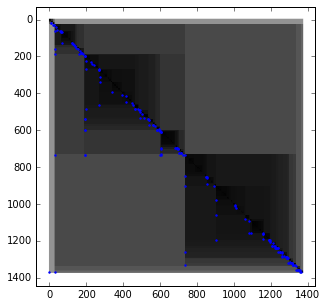

In [43]:
plt.figure(figsize = (10,5))
plt.imshow(A, cmap='gray')
plt.scatter(y1,x1,color='blue', s=2)
plt.savefig('model2banknote.eps') 

### ivat1.csv

In [44]:
# model1 #

In [46]:
A=np.loadtxt(open("iVAT1.csv", "rb"), delimiter=",")

R=A   #unnormalized
rows = A.shape[1]
cols = A.shape[0]
maxValue = np.amax(A)
minValue = np.amin(A)
fv=[]
for x in range(cols):
    for y in range(rows):
        A[x,y]=math.ceil(((A[x,y]-minValue)/(maxValue-minValue))*255) # Normalization
    
    
B=np.pad(A, ((3,3),(3,3)), 'constant',constant_values=0) #Padding the normalized with 0's for model1
for j in range(3,len(A)+3):
    fv.append(mvfeaturegeneration(B[j-3:j+4,j-3:j+4]))

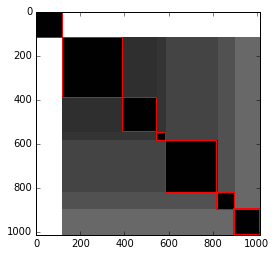

In [47]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from PIL import Image

xpred = scaler1.transform(fv)

classifier = {'rfc':rfc}#, 'knn':knn, 'dtc':dtc, 'classifier_linear':classifier_linear}

for name,clf in classifier.items():
    x =  clf.predict(xpred)
    L=[]  ### diagonal points detected as 1 from model1
    for i in range(0,len(x)):
        if x[i]==1:
            L.append(i)
    L.append(A.shape[0])
    
    plt.figure()
    fig,ax = plt.subplots(1)
    
    #B = A.astype('float32')#*255.0/65536.0
    #B = B.astype('uint16')
    ax.imshow(R, cmap='gray')
    width,height = L[0],L[0]
    for z in range(0,len(L)-1):
        rect = patches.Rectangle((L[z],L[z]),-width,-height,linewidth=1,edgecolor='r',facecolor='none')
        #  plt.scatter([int(L[z])],[int(L[z])], color='red', s=1)
        width, height = L[z+1]-L[z],L[z+1]-L[z]
        ax.add_patch(rect)
    rect = patches.Rectangle((L[z],L[z]),width,height,linewidth=2,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    
    img = 'iVat_'+name+'.eps'
    plt.savefig(img)
    plt.show()